# Pymaceuticals Inc.
---

### Analysis

- Based on the analysis, we can see that more of the mice were treated with either Ramicane or Capomulin. It appears that the number of female versus male mice was very similar. We can also see that of the different drug regimens, Infubinol was the only one that had an outlier for the final tumor volume. Ketapril has the largest variance and Ramicane has the lowest variance in relation to final tumor volume. 
The correlation between mouse weight and average tumor volume (mm3) is 0.84. This means there is a positive correlation, so when weight increases, the average tumor volume also increases. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data= pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_data = merged_data["Mouse ID"].unique()
number_of_mice= len(mice_data)
# Display the number of mice
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
# Display the duplicate mice 
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_data.loc[merged_data["Mouse ID"] == duplicate_mice_id[0]]

# Display the table
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset= ['Mouse ID', 'Timepoint'])

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_data["Mouse ID"].unique()
clean_number_mice = len(clean_mice_data)
clean_number_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_data = clean_data.set_index(["Drug Regimen"])
grouped_drug_regimen = drug_regimen_data.groupby("Drug Regimen")
drug_regimen_mean = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
drug_regimen_median = grouped_drug_regimen["Tumor Volume (mm3)"].median()
drug_regimen_variance = grouped_drug_regimen["Tumor Volume (mm3)"].var()
drug_regimen_std = grouped_drug_regimen["Tumor Volume (mm3)"].std()
drug_regimen_sem = grouped_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                     "Median Tumor Volume": drug_regimen_median,
                                     "Tumor Volume Variance": drug_regimen_variance,
                                     "Tumor Volume Std. Dev.": drug_regimen_std,
                                     "Tumor Volume Std. Err.": drug_regimen_sem})

drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen_summary = drug_regimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_drug_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

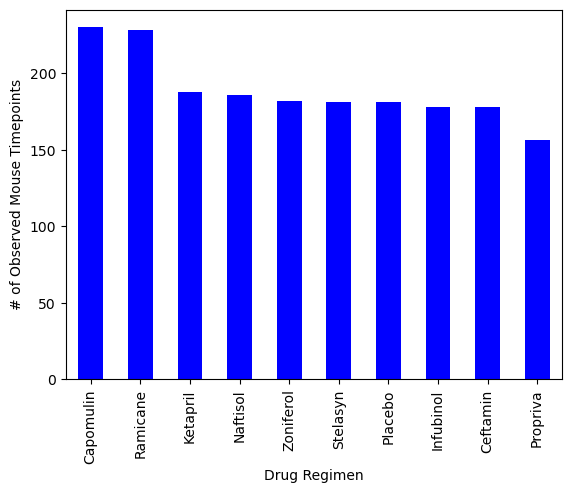

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Start by filtering the dataframe 
mice_plus_drugs = clean_data[["Drug Regimen","Timepoint"]]

# Find the count per each drug regimen
mice_per_drug_regimen = mice_plus_drugs["Drug Regimen"].value_counts()
mice_per_drug_regimen

# Create the bar chart of the data
mice_per_drug_regimen.plot(kind='bar', color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



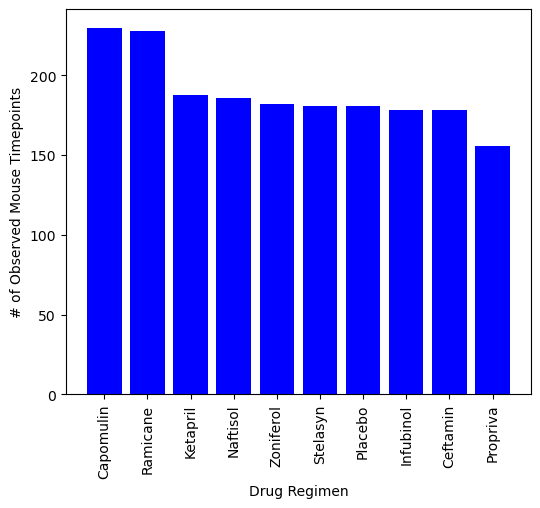

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Filter the DataFrame
mice_plus_drugs = clean_data[["Drug Regimen", "Timepoint"]]

# Find the count per each drug regimen
mice_per_drug_regimenpy = mice_plus_drugs["Drug Regimen"].value_counts()

# Create the bar chart using pyplot
plt.figure(figsize=(6,5))
plt.bar(mice_per_drug_regimenpy.index, mice_per_drug_regimenpy, color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

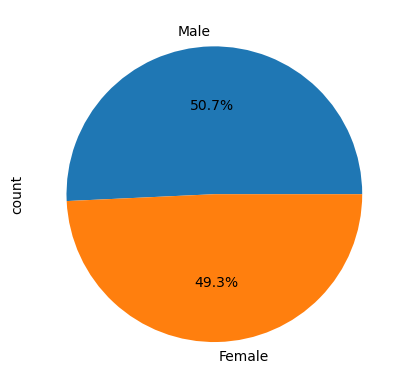

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
female_versus_male = clean_data["Sex"].value_counts()
# Get the unique mice with their gender
count = ["Male", "Female"]


# Make the pie chart
female_versus_male.plot(kind="pie", autopct="%1.1f%%", ylabel="count")
plt.show()

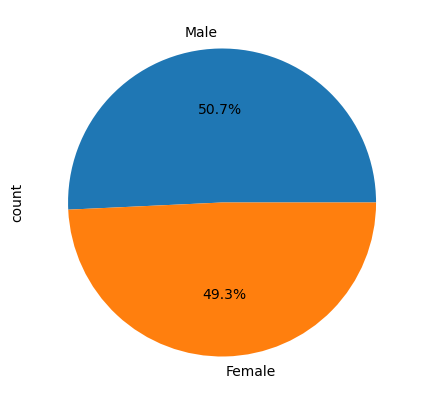

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
female_versus_male_py= clean_data['Sex'].value_counts()
gender= ["Male", "Female"]
# Make the pie chart
plt.figure(figsize=(5,5))
plt.pie(female_versus_male_py, labels= gender, autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane")
                                | (clean_data["Drug Regimen"] == "Infubinol") | (clean_data["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_data.groupby(["Drug Regimen", "Mouse ID"]).max()
last_timepoint_df = last_timepoint.reset_index()

# Retrieve the maximum timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()

# Put the four treatment groups in a list
treatment_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data
tumor_volume_data = []

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_data = pd.merge(last_timepoint_df, clean_data, on=["Mouse ID", "Timepoint"], how="inner")
merged_tumor_data

,Drug Regimen_x,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,Capomulin,b128,45,45.651331,2,Female,9,22,38.982878,2,Capomulin,Female,9,22
1,Capomulin,b742,45,45.000000,0,Male,7,21,38.939633,0,Capomulin,Male,7,21
2,Capomulin,f966,20,45.000000,0,Male,16,17,30.485985,0,Capomulin,Male,16,17
3,Capomulin,g288,45,46.304003,1,Male,3,19,37.074024,1,Capomulin,Male,3,19
4,Capomulin,g316,45,46.809225,2,Female,22,22,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,45.000000,0,Male,1,17,30.276232,0,Ramicane,Male,1,17
96,Ramicane,u196,45,47.622816,3,Male,18,25,40.667713,3,Ramicane,Male,18,25
97,Ramicane,w678,5,45.000000,0,Female,5,24,43.166373,0,Ramicane,Female,5,24
98,Ramicane,y449,15,46.378092,0,Male,19,24,44.183451,0,Ramicane,Male,19,24


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_tumor_data.loc[merged_tumor_data["Drug Regimen_y"] == treatment, "Tumor Volume (mm3)_y"]
    # add subset
    tumor_volume_data.append(tumor_volumes)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    outliers_data = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers_data}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3)_y, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)


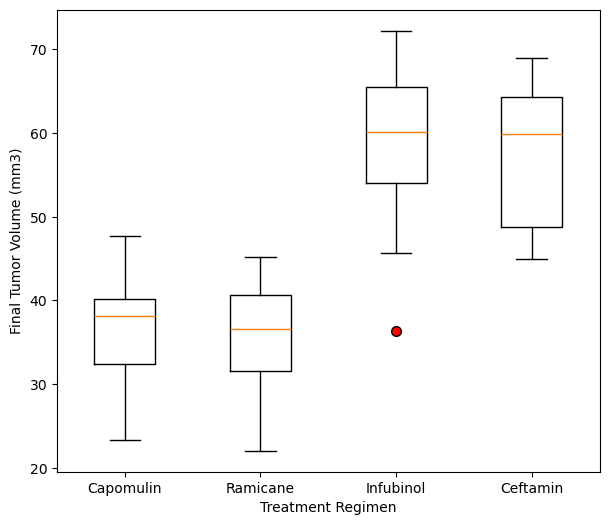

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize= (7, 6))
plt.boxplot(tumor_volume_data, labels= treatment_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=7))
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

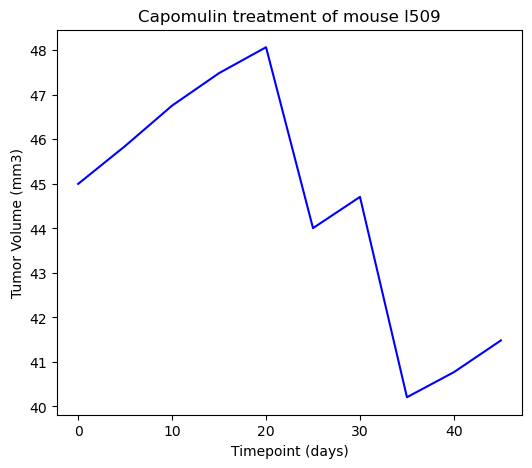

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin- l509
# Filter the data for mouse l509 treated with Capomulin
mouse_data = merged_data[(merged_data["Mouse ID"] =="l509") & (merged_data["Drug Regimen"] == "Capomulin")]

#Extract the tumor volume and time point data
tumor_volume_mouse = mouse_data["Tumor Volume (mm3)"]
time_point_mouse = mouse_data["Timepoint"]

# Create the line plot
plt.figure(figsize=(6, 5))
plt.plot(time_point_mouse, tumor_volume_mouse, color='b')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

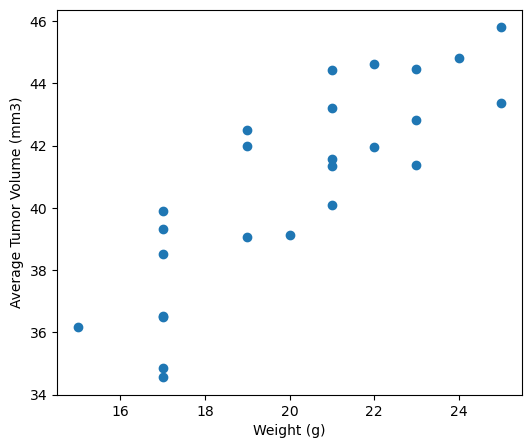

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
grouped_capomulin_df =capomulin_df.groupby("Mouse ID")

# Find the volume and weight values
average_tumor_volume = grouped_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = grouped_capomulin_df["Weight (g)"].mean()
average_capomulin = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": average_tumor_volume})

# Graph the data on a scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


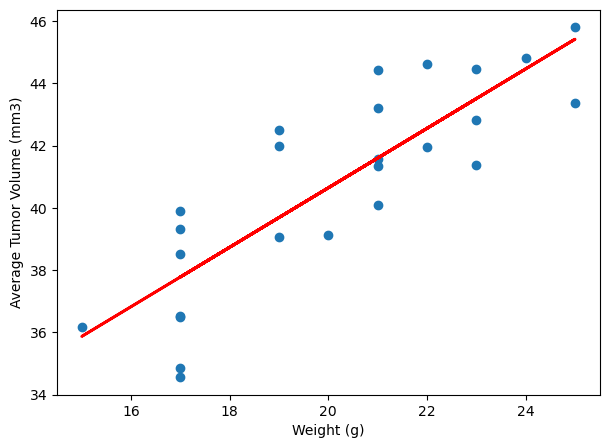

In [41]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Extracting the independent variable (X) and dependent variable (y)
X = average_capomulin["Weight (g)"].values
y = average_capomulin["Tumor Volume (mm3)"].values

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(X, y)
correlation_coefficient_rounded = round(correlation_coefficient, 2)

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = st.linregress(X, y)

# Generating the regression line
regression_values = slope * X + intercept


print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient_rounded}.")
# Plotting the Scatter Plot and Regression Line
plt.figure(figsize=(7, 5))
plt.scatter(X, y)
plt.plot(X, regression_values, color='red', linewidth=2)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

